In [3]:
import numpy as np
import matplotlib.pyplot as plt
from vega import VegaInterface, Wedge
from vega.analysis import Analysis

from vega import BuildConfig

from IPython.display import clear_output


%run -i "/global/homes/s/sfbeltr/bins/PolyChordLite/pypolychord/output.py"


print('Done loading.')

Done loading.


In [4]:
def plot_wedges(models, covariance, multi_model=False, labels=None, data=None, cross=False, models2=None, covariance2=None, data2=None, labels2=None):
    """Compute and plot wedges from vega model

    Parameters
    ----------
    models : np.array or list
        If multi_model is True, this is a list of correlation function models
        If multi_model is False, this is just a single model
    covariance : np.array
        The covariance matrix
    multi_model : bool, optional
        Whether there is only one or multiple models
    labels : list[string], optional
        List of labels for each model
    data : dict, optional
        Data vector
    cross : bool, optional
        Whether the input model/data are cross-correlations
    """
    plt.rcParams['font.size'] = 18
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    axs = np.array(axs).reshape(-1)
    mus = np.array([0., 0.5, 0.8, 0.95, 1.])
    mu_zip = zip(mus[:-1],mus[1:])

    for i, mu in enumerate(mu_zip):
        if not cross:
            wedge_obj = Wedge(mu=mu, rp=(0., 200., 50), rt=(0., 200., 50), r=(0., 200., 50), abs_mu=True)
        else:
            wedge_obj = Wedge(mu=mu, rp=(-200., 200., 100), rt=(0., 200., 50), r=(0., 200., 50), abs_mu=True)
        
        if data is not None:
            rd, dd, cd = wedge_obj(data, covariance=covariance)
            rdB, ddB, cdB = wedge_obj(data2, covariance=covariance2)

            axs[i].errorbar(rd, dd * rd**2, yerr=np.sqrt(cd.diagonal()) * rd**2, fmt="bo", ms=3, lw=.5)
            axs[i].errorbar(rdB, ddB * rdB**2, yerr=np.sqrt(cdB.diagonal()) * rdB**2, fmt="ro", ms=3, lw=.5)

        
        if multi_model:
            for model, label in zip(models, labels):
                r, d, _ = wedge_obj(model, covariance=covariance)
                axs[i].plot(r, d * r**2, '-', label=label)
        else:
            r, d, _ = wedge_obj(models, covariance=covariance)
            rB, dB, _ = wedge_obj(models2, covariance=covariance2)
            if  i == 1:
                axs[i].plot(r, d * r**2, 'b-', label=labels[0], lw=.9)           
                axs[i].plot(rB, dB * rB**2, 'r-', label=labels[1], lw=.9)
                axs[i].legend()
            else:
                axs[i].plot(r, d * r**2, 'b-', lw=.9)
                axs[i].plot(rB, dB * rB**2, 'r-', lw=.9)
        
        if i == 0 or i == 2:
            axs[i].set_ylabel(r"$r^2\xi(r)$")
        if i == 2 or i == 3:
            axs[i].set_xlabel(r"$r~[\mathrm{Mpc/h}]$")
        axs[i].set_title(r"${}<\mu<{}$".format(mu[0], mu[1]), fontsize=16)
        axs[i].set_xlim(0, 180)
        axs[i].legend()
        axs[i].grid()
        

In [5]:
def plot_3wedges(models, covariance, multi_model=False, labels=None, data=None, cross=False, \
                models2=None, covariance2=None, data2=None,  \
                models3=None, covariance3=None, data3=None  ):
    """Compute and plot wedges from vega model

    Parameters
    ----------
    models : np.array or list
        If multi_model is True, this is a list of correlation function models
        If multi_model is False, this is just a single model
    covariance : np.array
        The covariance matrix
    multi_model : bool, optional
        Whether there is only one or multiple models
    labels : list[string], optional
        List of labels for each model
    data : dict, optional
        Data vector
    cross : bool, optional
        Whether the input model/data are cross-correlations
    """
    plt.rcParams['font.size'] = 18
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    axs = np.array(axs).reshape(-1)
    mus = np.array([0., 0.5, 0.8, 0.95, 1.])
    mu_zip = zip(mus[:-1],mus[1:])

    for i, mu in enumerate(mu_zip):
        if not cross:
            wedge_obj = Wedge(mu=mu, rp=(0., 200., 50), rt=(0., 200., 50), r=(0., 200., 50), abs_mu=True)
        else:
            wedge_obj = Wedge(mu=mu, rp=(-200., 200., 100), rt=(0., 200., 50), r=(0., 200., 50), abs_mu=True)
        
        if data is not None:
            rd, dd, cd = wedge_obj(data, covariance=covariance)
            rdB, ddB, cdB = wedge_obj(data2, covariance=covariance2)
            rdBH, ddBH, cdBH = wedge_obj(data3, covariance=covariance3)
            
            axs[i].errorbar(rd, dd * rd**2, yerr=np.sqrt(cd.diagonal()) * rd**2, fmt="bo", ms=3, lw=.5)
            axs[i].errorbar(rdB, ddB * rdB**2, yerr=np.sqrt(cdB.diagonal()) * rdB**2, fmt="ro", ms=3, lw=.5)
            axs[i].errorbar(rdBH, ddBH * rdBH**2, yerr=np.sqrt(cdBH.diagonal()) * rdBH**2, fmt="go", ms=3, lw=.5)

        
        if multi_model:
            for model, label in zip(models, labels):
                r, d, _ = wedge_obj(model, covariance=covariance)
                axs[i].plot(r, d * r**2, '-', label=label)
        else:
            r, d, _ = wedge_obj(models, covariance=covariance)
            rB, dB, _ = wedge_obj(models2, covariance=covariance2)
            rBH, dBH, _ = wedge_obj(models3, covariance=covariance3)            
            if  i == 1:
                axs[i].plot(r, d * r**2, 'b-', label=labels[0], lw=.9)           
                axs[i].plot(rB, dB * rB**2, 'r-', label=labels[1], lw=.9)
                axs[i].plot(rBH, dBH * rBH**2, 'g-', label=labels[2], lw=.9)
                axs[i].legend()
            else:
                axs[i].plot(r, d * r**2, 'b-', lw=.9)
                axs[i].plot(rB, dB * rB**2, 'r-', lw=.9)
                axs[i].plot(rBH, dBH * rBH**2, 'g-', lw=.9)
        
        if i == 0 or i == 2:
            axs[i].set_ylabel(r"$r^2\xi(r)$")
        if i == 2 or i == 3:
            axs[i].set_xlabel(r"$r~[\mathrm{Mpc/h}]$")
        axs[i].set_title(r"${}<\mu<{}$".format(mu[0], mu[1]), fontsize=16)
        axs[i].set_xlim(0, 180)
        axs[i].grid()
        

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   0.94    |   0.05    |            |            |  0.01   |    2    |       |
| 1 | at           |   1.00    |   0.05    |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.211   |   0.012   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   1.83    |   0.22    |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.050   |   0.013   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    0.7    |    0.5    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

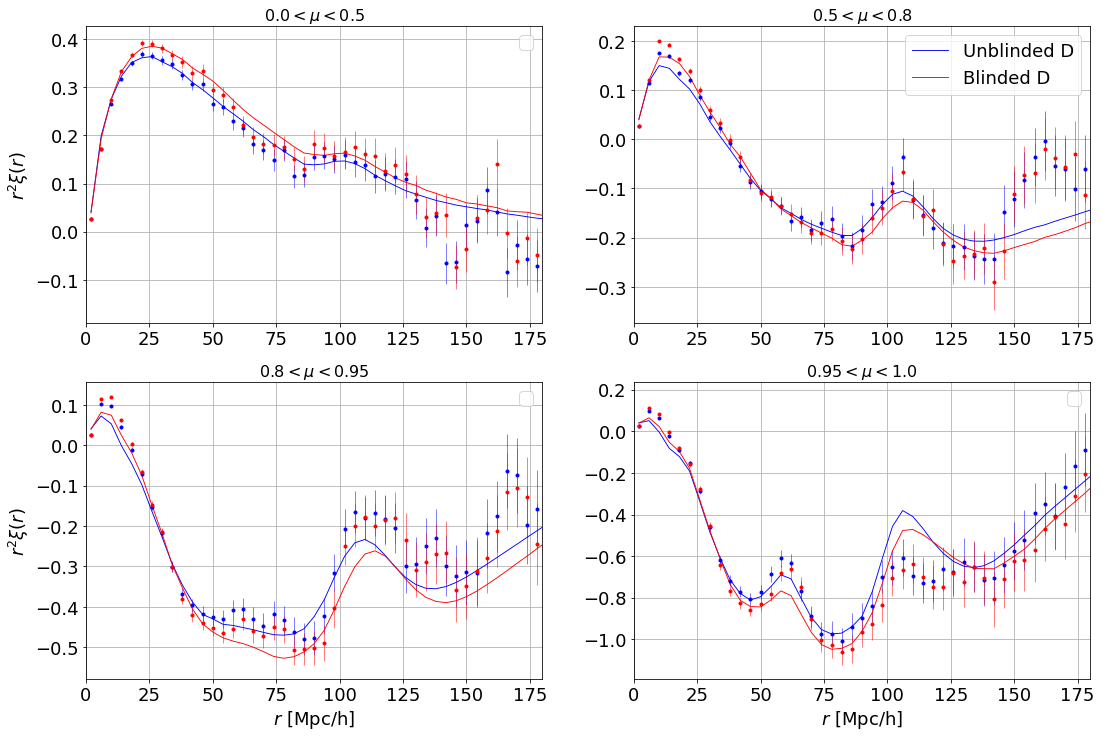

In [12]:
# Build the config files    
# LyaCOLORE with metals

path = '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1M/fit/vega/'
pathB = '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1MB-v2/fit/vega/'


options = {'scale_params':'ap_at', 'template':'PlanckDR16/PlanckDR16.fits', 'full_shape':False,
          'small_scale_nl':True, 'bao_broadening':True, 'velocity_dispersion':'lorentz', 'radiation_effects':True,
          'hcd_model':'Rogers2018', 'metals':['SiII(1190)', 'SiII(1193)', 'SiIII(1207)', 'SiII(1260)']}

config_builder = BuildConfig(options)

fit_type = 'lyalya_lyalya'

fit_info = {'fitter':True, 'sampler':False, 'zeff':2.33, 'use_bias_eta':{'LYA':True, 'QSO':True},
            'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}

correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1M/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['metal_path'] = '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1M/out/metal_dmat.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 30
correlations['lyalya_lyalya']['r-max'] = 180
correlations['lyalya_lyalya']['binsize'] = 4

out_path = path
config_builder.build(correlations, fit_type, fit_info, out_path)

###


config_builder = BuildConfig(options)


correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1MB-v2/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['metal_path'] = '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1MB-v2/out/metal_dmat.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 180
correlations['lyalya_lyalya']['binsize'] = 4

out_path = pathB
config_builder.build(correlations, fit_type, fit_info, out_path)

vega = VegaInterface(path+'main.ini')
vegaB = VegaInterface(pathB+'main.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()


model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

plot_wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, \
            models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
            data2=vegaB.data['lyalya_lyalya'].data_vec, labels = [r'Unblinded D', r'Blinded D' ]  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

/global/homes/s/sfbeltr/.local/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   0.94    |   0.05    |            |            |  0.01   |    2    |       |
| 1 | at           |   1.00    |   0.05    |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.211   |   0.012   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   1.83    |   0.22    |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.050   |   0.013   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    0.7    |    0.5    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

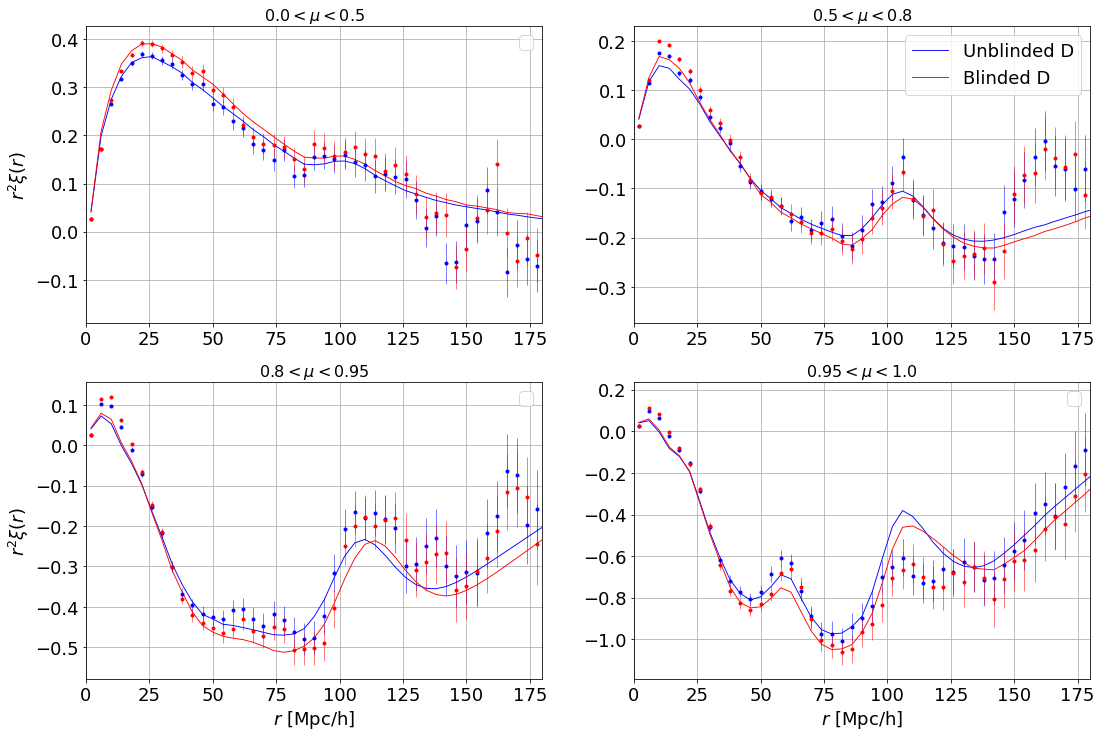

In [11]:

model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

plot_wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, \
            models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
            data2=vegaB.data['lyalya_lyalya'].data_vec, labels = [r'Unblinded D', r'Blinded D' ]  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params ) 

In [13]:
# Build the config files    
# LyaCOLORE without metals

path = '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1/fit/vega/'
pathB = '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1B-v2/fit/vega/'


options = {'scale_params':'ap_at', 'template':'PlanckDR16/PlanckDR16.fits', 'full_shape':False,
          'small_scale_nl':True, 'bao_broadening':True, 'velocity_dispersion':'lorentz', 'radiation_effects':True,
          'hcd_model':'Rogers2018'}

config_builder = BuildConfig(options)

fit_type = 'lyalya_lyalya'

fit_info = {'fitter':True, 'sampler':False, 'zeff':2.33, 'use_bias_eta':{'LYA':True, 'QSO':True},
            'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}

correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 160
correlations['lyalya_lyalya']['binsize'] = 4

out_path = path
config_builder.build(correlations, fit_type, fit_info, out_path)

###


config_builder = BuildConfig(options)

fit_info = {'fitter':True, 'sampler':False, 'zeff':2.38, 'use_bias_eta':{'LYA':True, 'QSO':True},
            'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}


correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1B-v2/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 160
correlations['lyalya_lyalya']['binsize'] = 4

out_path = pathB
config_builder.build(correlations, fit_type, fit_info, out_path)



PosixPath('/global/homes/s/sfbeltr/respaldo/out_blinding/output-desi-Y1B-v2/fit/vega/main.ini')

In [13]:
vega = VegaInterface(path+'main.ini')
vegaB = VegaInterface(pathB+'main.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()

print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )


Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   0.954   |   0.029   |            |            |  0.01   |    2    |       |
| 1 | at           |   0.99    |   0.04    |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.201   |   0.005   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   2.02    |   0.13    |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.024   |   0.006   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    2.2    |    0.8    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   0.954   |   0.029   |            |            |  0.01   |    2    |       |
| 1 | at           |   0.99    |   0.04    |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.201   |   0.005   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   2.02    |   0.13    |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.024   |   0.006   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    2.2    |    0.8    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

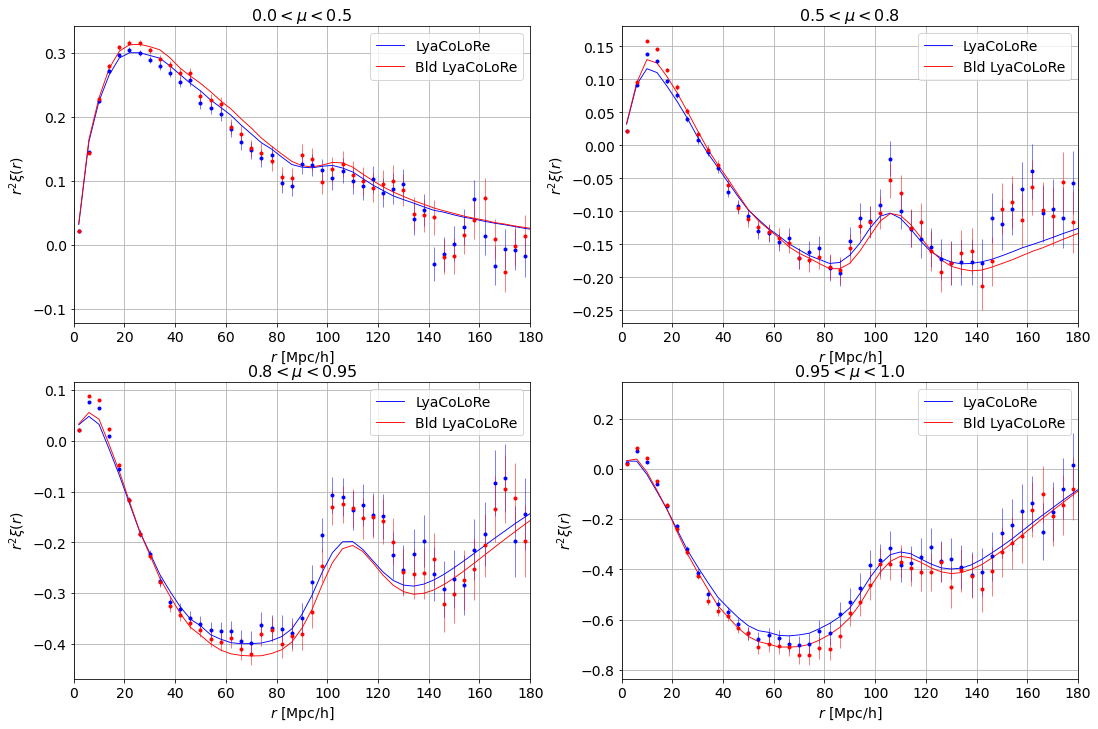

In [11]:
model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

plot_wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, \
            models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
            data2=vegaB.data['lyalya_lyalya'].data_vec  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

In [8]:
# Blinding 
# LyaCOLORE without metals and low noise (1000)


path  = '/global/cscratch1/sd/sfbeltr/desi-1.0-1000/output/fit/vega/'
pathB = '/global/cscratch1/sd/sfbeltr/desi-1.0-1000/outputB/fit/vega/'

vega = VegaInterface(path+'main.ini')
vegaB = VegaInterface(pathB+'main.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()

print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )


Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   1.001   |   0.012   |            |            |  0.01   |    2    |       |
| 1 | at           |   1.010   |   0.017   |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.1883  |  0.0014   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   1.883   |   0.025   |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.0156  |  0.0012   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    5.0    |    0.8    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   1.001   |   0.012   |            |            |  0.01   |    2    |       |
| 1 | at           |   1.010   |   0.017   |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.1883  |  0.0014   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   1.883   |   0.025   |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.0156  |  0.0012   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    5.0    |    0.8    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

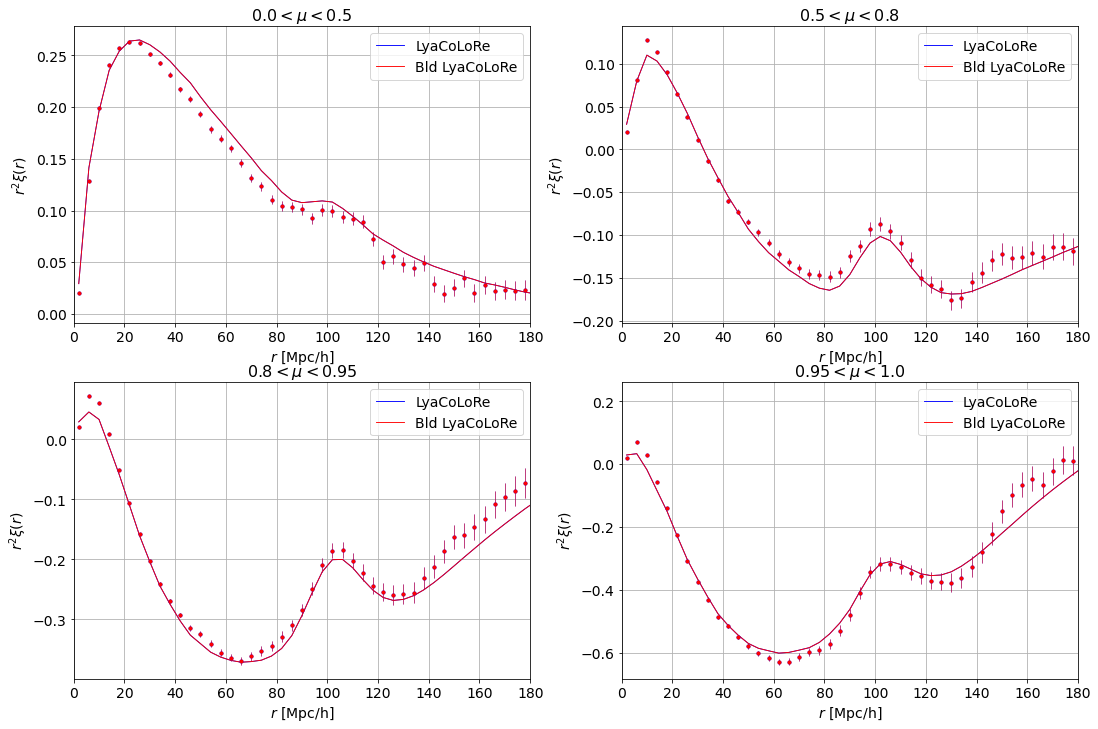

In [7]:
model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

plot_wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, \
            models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
            data2=vegaB.data['lyalya_lyalya'].data_vec  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   1.000   |   0.012   |            |            |  0.01   |    2    |       |
| 1 | at           |   1.007   |   0.016   |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.1907  |  0.0019   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   1.94    |   0.04    |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.0186  |  0.0021   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |    4.0    |    0.6    |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

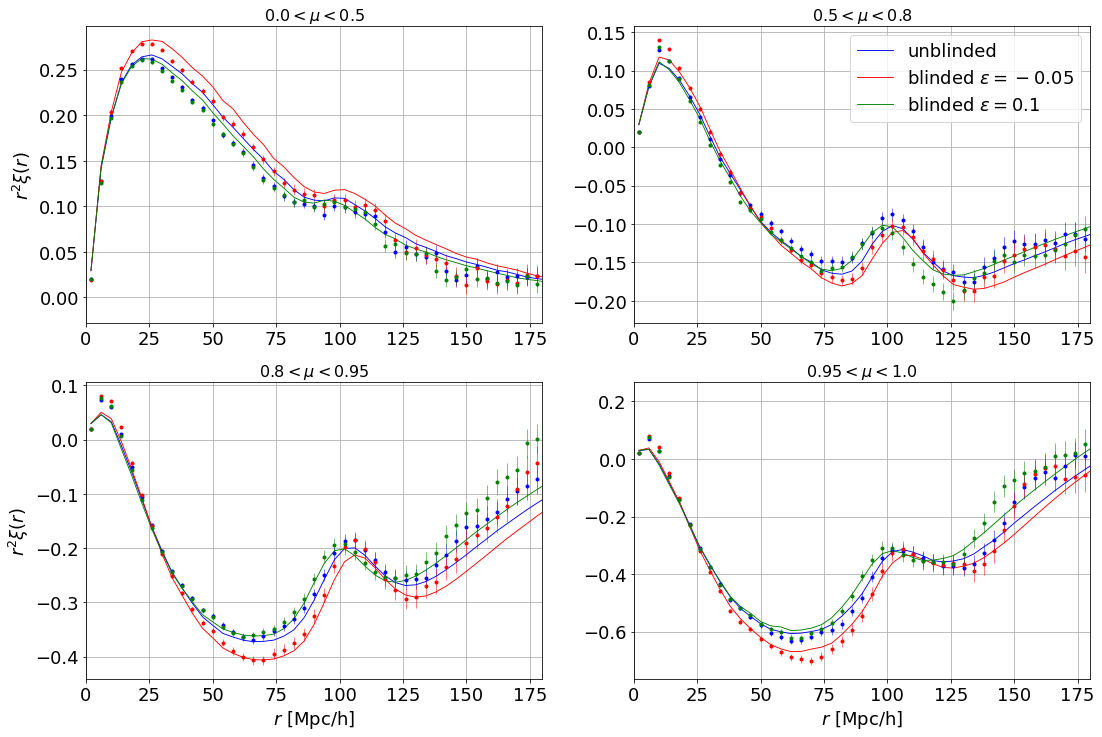

In [5]:
# Desi-2.0-1000 low noise mocks
if 1:

    path = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/output/fit/vega/'
    pathB = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputB/fit/vega/'
    pathBH = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputBH1.1/fit/vega/'


    options = {'scale_params':'ap_at', 'template':'PlanckDR16/PlanckDR16.fits', 'full_shape':False,
              'small_scale_nl':True, 'bao_broadening':True, 'velocity_dispersion':'lorentz', 'radiation_effects':True,
              'hcd_model':'Rogers2018'}

    ###  CLEAN CATALOG
    config_builder = BuildConfig(options)

    fit_type = 'lyalya_lyalya'

    fit_info = {'fitter':True, 'sampler':False, 'zeff':2.33, 'use_bias_eta':{'LYA':True, 'QSO':True},
                'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}

    correlations = {'lyalya_lyalya':{}}
    correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/output/out/e_cf.fits.gz'
    correlations['lyalya_lyalya']['r-min'] = 20
    correlations['lyalya_lyalya']['r-max'] = 180
    correlations['lyalya_lyalya']['binsize'] = 4

    out_path = path
    config_builder.build(correlations, fit_type, fit_info, out_path)
    ##########################

    ### BLINDED low OM


    config_builder = BuildConfig(options)


    correlations = {'lyalya_lyalya':{}}
    correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputB/out/e_cf.fits.gz'
    correlations['lyalya_lyalya']['r-min'] = 20
    correlations['lyalya_lyalya']['r-max'] = 180
    correlations['lyalya_lyalya']['binsize'] = 4

    out_path = pathB
    config_builder.build(correlations, fit_type, fit_info, out_path)
    ##########################

    ### BLINDED high OM


    config_builder = BuildConfig(options)


    correlations = {'lyalya_lyalya':{}}
    correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputBH1.1/out/e_cf.fits.gz'
    correlations['lyalya_lyalya']['r-min'] = 20
    correlations['lyalya_lyalya']['r-max'] = 180
    correlations['lyalya_lyalya']['binsize'] = 4

    out_path = pathBH
    config_builder.build(correlations, fit_type, fit_info, out_path)
    ##########################


    vega = VegaInterface(path+'main.ini')
    vegaB = VegaInterface(pathB+'main.ini')
    vegaBH = VegaInterface(pathBH+'main.ini')

    print('Minimizing unblinded case:\n')
    vega.minimize()
    print('Minimizing blinded L case:\n')
    vegaB.minimize()
    print('Minimizing blinded H case:\n')
    vegaBH.minimize()


    clear_output()

    print( 'Unblinded case:',   vega.bestfit.params )
    print( 'Blinded L case:',   vegaB.bestfit.params )
    print( 'Blinded H case:',   vegaBH.bestfit.params )

    model = vega.compute_model(vega.bestfit.values)
    modelB = vegaB.compute_model(vegaB.bestfit.values)
    modelBH = vegaBH.compute_model(vegaBH.bestfit.values)

##########################
if 1: 



    plot_3wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, \
                labels = [ r'unblinded', r'blinded $\epsilon=-0.05$', r'blinded $\epsilon=0.1$'], \
                models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
                data2=vegaB.data['lyalya_lyalya'].data_vec, models3=modelBH['lyalya_lyalya'], covariance3= vegaBH.data['lyalya_lyalya'].cov_mat,\
                data3=vegaBH.data['lyalya_lyalya'].data_vec)#



/global/homes/s/sfbeltr/.local/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
No handles with labels found to put in legend.


TypeError: 'NoneType' object is not subscriptable

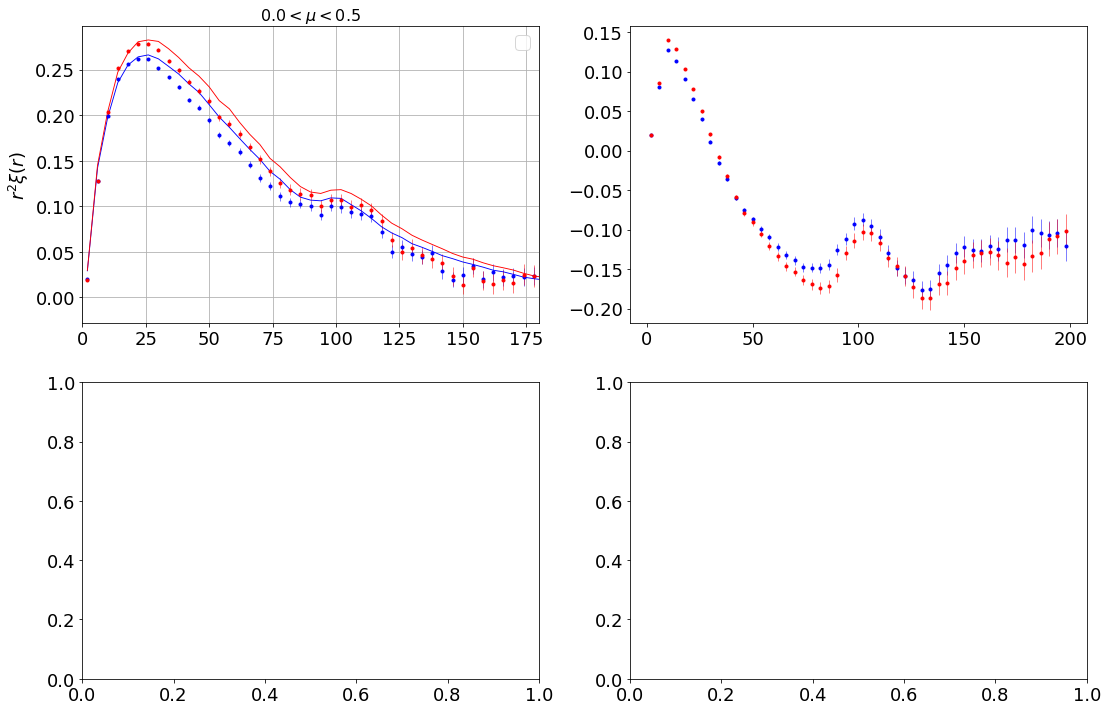

In [6]:
model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

plot_wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, \
            models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
            data2=vegaB.data['lyalya_lyalya'].data_vec  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   0.99    |   0.14    |            |            |  0.01   |    2    |       |
| 1 | at           |   0.87    |   0.13    |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |  -0.198   |   0.013   |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   2.39    |   0.25    |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.020   |   0.005   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |     5     |     5     |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

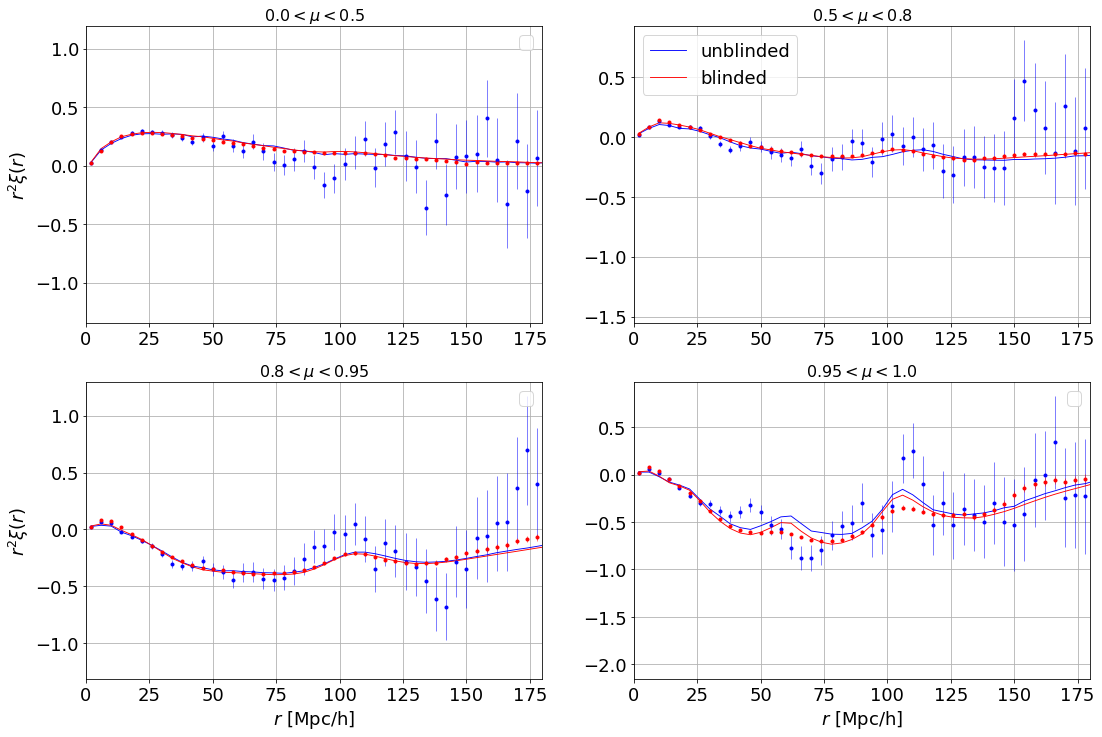

In [15]:

# Desi-2.2-1000 low mnoise mocks with metals

# Build the config files    
# LyaCOLORE with metals

%run -i "/global/homes/s/sfbeltr/bins/PolyChordLite/pypolychord/output.py"

path = '/global/cscratch1/sd/sfbeltr/desi-2.2-1000/output/fit/vega/'
pathB = '/global/cscratch1/sd/sfbeltr/desi-2.2-1000/outputB/fit/vega/'



options = {'scale_params':'ap_at', 'template':'PlanckDR16/PlanckDR16.fits', 'full_shape':False,
          'small_scale_nl':True, 'bao_broadening':True, 'velocity_dispersion':'lorentz', 'radiation_effects':True,
          'hcd_model':'Rogers2018', 'metals':['SiII(1190)', 'SiII(1193)', 'SiIII(1207)', 'SiII(1260)']}

config_builder = BuildConfig(options)

fit_type = 'lyalya_lyalya'

fit_info = {'fitter':True, 'sampler':False, 'zeff':2.33, 'use_bias_eta':{'LYA':True, 'QSO':True},
            'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}

correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.2-1000/output/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['metal_path'] = '/global/cscratch1/sd/sfbeltr/desi-2.2-1000/output/out/metal_dmat.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 180
correlations['lyalya_lyalya']['binsize'] = 4

out_path = path
config_builder.build(correlations, fit_type, fit_info, out_path)

###


config_builder = BuildConfig(options)

fit_type = 'lyalya_lyalya'

fit_info = {'fitter':True, 'sampler':False, 'zeff':2.39, 'use_bias_eta':{'LYA':True, 'QSO':True},
            'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}

correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.2-1000/outputB/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['metal_path'] = '/global/cscratch1/sd/sfbeltr/desi-2.2-1000/outputB/out/metal_dmat.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 180
correlations['lyalya_lyalya']['binsize'] = 4

out_path = pathB
config_builder.build(correlations, fit_type, fit_info, out_path)


vega = VegaInterface(path+'main.ini')
vegaB = VegaInterface(pathB+'main.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()

model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

plot_wedges(model['lyalya_lyalya'], vega.data['lyalya_lyalya'].cov_mat, data=vega.data['lyalya_lyalya'].data_vec, labels=['unblinded','blinded'], \
            models2=modelB['lyalya_lyalya'], covariance2= vegaB.data['lyalya_lyalya'].cov_mat, \
            data2=vegaB.data['lyalya_lyalya'].data_vec  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   1.000   |   0.009   |            |            |   0.1   |    2    |       |
| 1 | at           |   1.006   |   0.010   |            |            |   0.1   |    2    |       |
| 2 | bias_eta_LYA | -219.6e-3 |  0.7e-3   |            |            |  -0.5   |    0    |       |
| 3 | beta_LYA     |   2.611   |   0.019   |            |            |   0.5   |    5    |       |
--------------------------------------------------------------------------------------------------
Blinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  

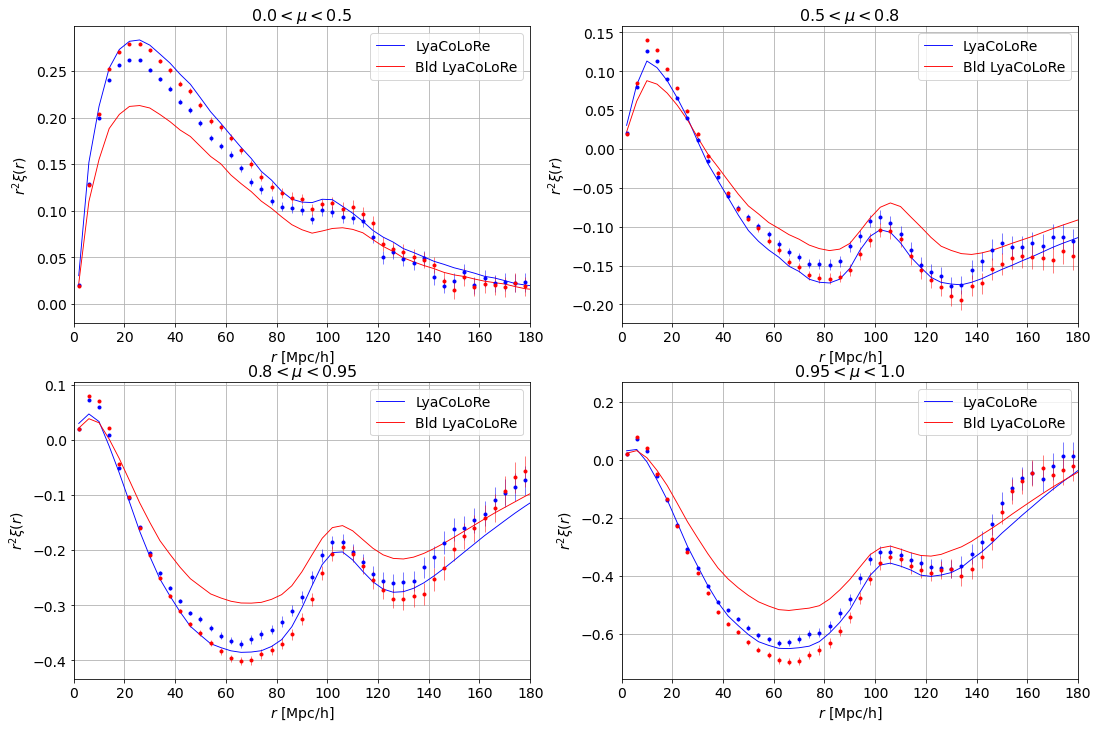

In [24]:
# Desi-2.0-1000 low noise mocks X correlation

path = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/output/fit/vega/'
pathB = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputB/fit/vega/'


vega = VegaInterface(path+'main.ini')
vegaB = VegaInterface(pathB+'main.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()

##########################



model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

modelString = 'lyaxlya'

plot_wedges(model[modelString], vega.data[modelString].cov_mat, data=vega.data[modelString].data_vec, \
            models2=modelB[modelString], covariance2= vegaB.data[modelString].cov_mat, \
            data2=vegaB.data[modelString].data_vec  )#


print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

In [6]:
# Desi-2.0-1000 low noise mocks lya auto correlation



path = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/output/fit/vega2/'
pathB = '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputB/fit/vega2/'


options = {'scale_params':'ap_at', 'template':'PlanckDR16/PlanckDR16.fits', 'full_shape':False,
          'small_scale_nl':True, 'bao_broadening':True, 'velocity_dispersion':'lorentz', 'radiation_effects':True,
          'hcd_model':'Rogers2018'}

config_builder = BuildConfig(options)

fit_type = 'lyalya_lyalya'

fit_info = {'fitter':True, 'sampler':False, 'zeff':2.33, 'use_bias_eta':{'LYA':True, 'QSO':True},
            'sample_params':['ap','at','bias_eta_LYA','beta_LYA','bias_hcd','beta_hcd']}

correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/output/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 160
correlations['lyalya_lyalya']['binsize'] = 4

out_path = path
config_builder.build(correlations, fit_type, fit_info, out_path)

###


config_builder = BuildConfig(options)


correlations = {'lyalya_lyalya':{}}
correlations['lyalya_lyalya']['corr_path'] =  '/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputB/out/e_cf.fits.gz'
correlations['lyalya_lyalya']['r-min'] = 20
correlations['lyalya_lyalya']['r-max'] = 160
correlations['lyalya_lyalya']['binsize'] = 4

out_path = pathB
config_builder.build(correlations, fit_type, fit_info, out_path)



PosixPath('/global/cscratch1/sd/sfbeltr/desi-2.0-1000/outputB/fit/vega2/main.ini')

In [8]:
vega = VegaInterface(path+'main.ini')
vegaB = VegaInterface(pathB+'main.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()

print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )


INFO: reading input Pk /global/homes/s/sfbeltr/.conda/envs/vega/lib/python3.8/site-packages/vega-0.1.0-py3.8.egg/vega/models/PlanckDR16/PlanckDR16.fits
Reading data file /global/cscratch1/sd/sfbeltr/desi-2.0-1000/output/out/e_xcf.fits.gz



NameError: name 'pathB' is not defined

Unblinded case: --------------------------------------------------------------------------------------------------
|   | Name         |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
--------------------------------------------------------------------------------------------------
| 0 | ap           |   0.998   |   0.004   |            |            |  0.01   |    2    |       |
| 1 | at           |   0.998   |   0.004   |            |            |  0.01   |    2    |       |
| 2 | bias_eta_LYA |-341.18e-3 |  0.31e-3  |            |            |   -2    |    0    |       |
| 3 | beta_LYA     |   2.383   |   0.005   |            |            |    0    |    5    |       |
| 4 | bias_hcd     |  -0.000   |   0.001   |            |            |  -0.2   |    0    |       |
| 5 | beta_hcd     |     2     |     4     |            |            |    0    |    5    |       |
---------------------------------------------------------------------------------------------

ValueError: shapes (50,2500) and (5000,) not aligned: 2500 (dim 1) != 5000 (dim 0)

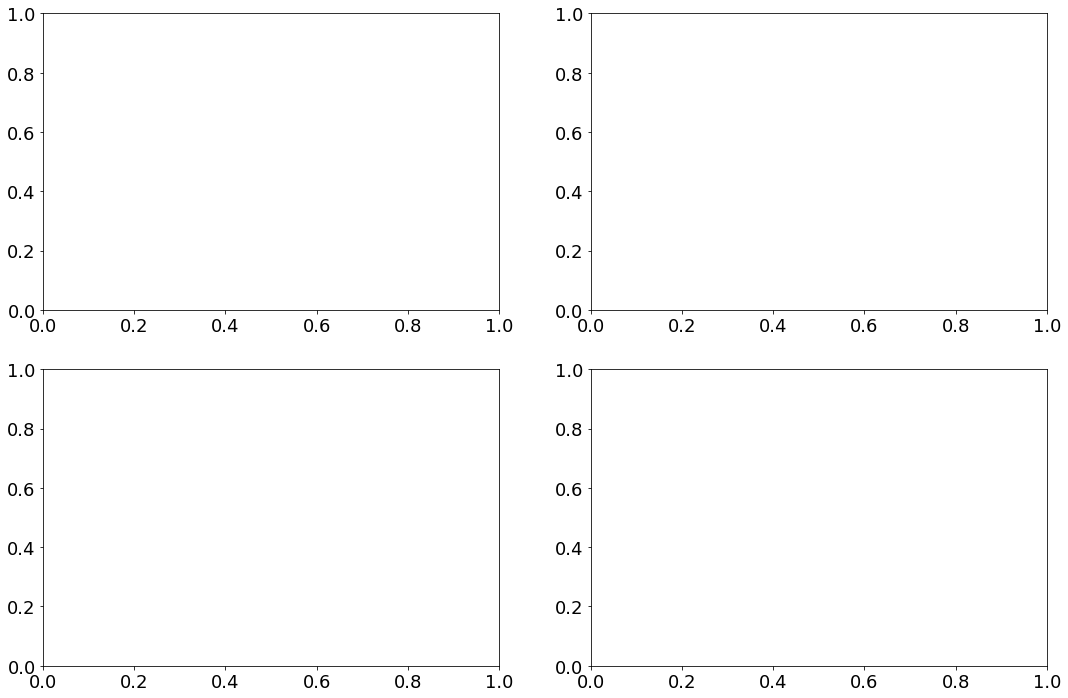

In [8]:
#     VEGA fit with desi-2.0-1000
path = '/global/homes/s/sfbeltr/respaldo/piccaVersions/Vega/examples/C/'
pathB = '/global/homes/s/sfbeltr/respaldo/piccaVersions/Vega/examples/B/'
vega = VegaInterface(path+'main_fit.ini')
vegaB = VegaInterface(pathB+'main_fit.ini')

print('Minimizing unblinded case:\n')
vega.minimize()
print('Minimizing blinded case:\n')
vegaB.minimize()

clear_output()

print( 'Unblinded case:',   vega.bestfit.params )
print( 'Blinded case:',   vegaB.bestfit.params )

model = vega.compute_model(vega.bestfit.values)
modelB = vegaB.compute_model(vegaB.bestfit.values)

#plot_wedges(model['qsoxlya'], vega.data['qsoxlya'].cov_mat, data=None   )#
#plot_wedges(model['qsoxlya'], vega.data['qsoxlya'].cov_mat, data=vega.data['qsoxlya'].data_vec   )#



In [20]:
model

{'qsoxlya': array([1.21571957e-04, 1.33689503e-04, 1.03015077e-04, ...,
        1.49061498e-05, 1.43216243e-05, 1.36733727e-05])}